# `SLiM` sampling

"""
Working doc for calculating sampling frequencies from simulated frequency landscapes
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from numpy import genfromtxt
%matplotlib inline

## Functions to parse `SLiM` outputs for replicate simulations

### Define $outputparse()$ to collect `SLiM` output file names with $glob()$ 

In [2]:
def outputparse(output_dir, label):
    allslimoutputfile = glob.glob(output_dir)
    slimoutputfile = []
    for i in range(len(allslimoutputfile)):
        if len(allslimoutputfile[i].split(label)) > 1:
            slimoutputfile.append(allslimoutputfile[i])
    return slimoutputfile

### Collect filenames from freqvecreps .csv in slimoutputfiles

In [3]:
output_dir = "../../data/output/concat_reps/*"
label = "test"
output = outputparse(output_dir,label)

In [4]:
output

['../../data/output/concat_reps/concat_reps_numdemes_4_demepopsize_1000_m_1e-05_mu_0.001_s_-0.01_testA.csv',
 '../../data/output/concat_reps/concat_reps_numdemes_3_demepopsize_1000_m_1e-05_mu_0.001_s_-0.01_testA.csv',
 '../../data/output/concat_reps/concat_reps_numdemes_4_demepopsize_1000_m_1e-05_mu_0.001_s_-0.01_testB.csv',
 '../../data/output/concat_reps/concat_reps_numdemes_5_demepopsize_1000_m_1e-05_mu_0.001_s_-0.01_test.csv',
 '../../data/output/concat_reps/concat_reps_numdemes_4_demepopsize_1000_m_1e-05_mu_0.001_s_-0.01_test.csv']

In [5]:
genfromtxt(output[0],delimiter=",").shape

(4, 4)

### Define $\sigma$ sampling parameter

[0.043  0.032  0.0505 0.076 ]
[0.04183333 0.05283333 0.0565     0.05033333]


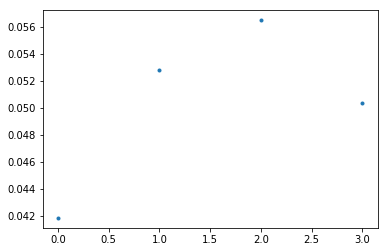

In [7]:
from numpy.fft import fft, ifft

def periodic_corr(x, y):
    """
    Periodic correlation, implemented using the FFT.
    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real
	
# Example usage:
L = len(freqvec)

## Define sampling function (rectangular here)
w = 3
phi = np.ones(w)/w
phi = np.pad(phi,(0,L-w),mode='constant')

## Example data: peaked at one entry.
print(freqvec)
## Convolve data with sampling function.
samples = periodic_corr(freqvec, phi)
print(samples)
plt.plot(samples, '.')


### Collect sampled frequencies for all sigma:

F = periodic_corr(all_freqvec,[phi]*all_freqvec.shape[1])

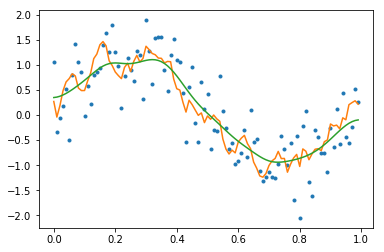

In [8]:
x = np.arange(0,1,0.01)
y = np.sin(2*np.pi*x) + np.random.normal(size=len(x))/2
plt.plot(x,y, '.')
w = 5
phi = np.ones(w)/w
phi = np.pad(phi,(0,len(x)-w),mode='constant')
plt.plot(x, periodic_corr(y,phi), '-')

from scipy.ndimage import gaussian_filter1d
plt.plot(x, gaussian_filter1d(y,sigma=5))

# Incorparate into src/sampling:

In [39]:
sigma =2

In [40]:
def periodic_corr(x,y):
    """
    Periodic correlation, implemented using the FFT.
    x and y must be real sequences with the same length.
    """
    return ifft(fft(x) * fft(y).conj()).real

In [41]:
def unif_samp_circ_conv(freq_arr,sigma):
    L = freq_arr.shape[1]
    numreps = freq_arr.shape[0]
    # Create vector of phi with len(L) for periodic correlation
    phi = np.ones(sigma)/sigma
    phi = np.pad(phi,(0,L-sigma),mode='constant')
    # Pre-allocate array of sampled aafrequencies
    F = np.zeros((numreps,L))
    # Iterate over replicates to populate F
    for i in np.arange(numreps):
        F[i] = periodic_corr(freq_arr[i],[phi])
    return F

In [42]:
unif_samp_circ_conv(freq_arr,sigma)

array([[0.5580829 , 0.33263739, 0.50864147, 0.51502809, 0.43692956],
       [0.37321171, 0.77222547, 0.62330735, 0.41784261, 0.20971558],
       [0.53060276, 0.9527493 , 0.66346439, 0.55415803, 0.41222794],
       [0.4529474 , 0.63236066, 0.50574885, 0.20644044, 0.2173891 ],
       [0.80386436, 0.45196377, 0.42076156, 0.40077685, 0.38501488],
       [0.36402613, 0.54398686, 0.52656278, 0.62064101, 0.63114512]])

In [60]:
import scipy.ndimage as sp

In [43]:
from scipy.ndimage import uniform_filter1d

In [61]:
freq_arr

array([[0.65598845, 0.46017735, 0.20509742, 0.81218552, 0.21787066],
       [0.01616655, 0.73025686, 0.81419408, 0.43242061, 0.4032646 ],
       [0.09938776, 0.96181776, 0.94368084, 0.38324794, 0.72506812],
       [0.33728425, 0.56861055, 0.69611076, 0.31538693, 0.09749395],
       [0.75690017, 0.85082854, 0.053099  , 0.78842412, 0.01312958],
       [0.35710615, 0.3709461 , 0.71702762, 0.33609794, 0.90518408]])

In [62]:
uniform_filter1d(freq_arr,size = sigma,mode = "wrap")

array([[0.43692956, 0.5580829 , 0.33263739, 0.50864147, 0.51502809],
       [0.20971558, 0.37321171, 0.77222547, 0.62330735, 0.41784261],
       [0.41222794, 0.53060276, 0.9527493 , 0.66346439, 0.55415803],
       [0.2173891 , 0.4529474 , 0.63236066, 0.50574885, 0.20644044],
       [0.38501488, 0.80386436, 0.45196377, 0.42076156, 0.40077685],
       [0.63114512, 0.36402613, 0.54398686, 0.52656278, 0.62064101]])

In [63]:
unit_impulse = np.zeros((2,10))
unit_impulse[0,4] = 1
unit_impulse[1,5] = 1
print(unit_impulse)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


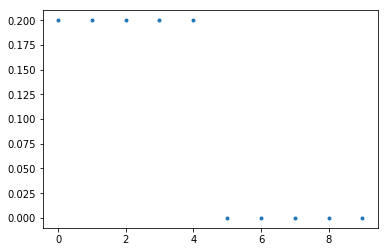

In [64]:
plt.plot(unif_samp_circ_conv(unit_impulse,sigma=5)[0],'.')

In [65]:
uniform_filter1d(unit_impulse,size = 5,mode = "wrap")

array([[0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ]])

In [67]:
%%timeit
uniform_filter1d(unit_impulse, size=5, mode='wrap')

2.79 µs ± 57.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [68]:
%%timeit
unif_samp_circ_conv(unit_impulse,sigma=5)

71.8 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [74]:
uniform_filter1d(unit_impulse,size=5,mode="wrap")

array([[0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ]])